In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Summary.xlsx', sheet_name="Summary")

In [4]:
df = df[df['cell gap(Fab1 RETS, DC, 37 V)']!="BURN"]

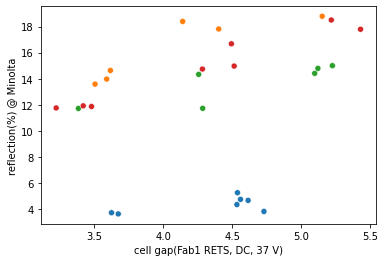

In [23]:
sns.scatterplot(data=df, x='cell gap(Fab1 RETS, DC, 37 V)', y='反射率(Minolta)', hue='LC')
plt.ylabel("reflection(%) @ Minolta")
plt.legend().remove()
plt.savefig('reflec_mino.png')
plt.show()

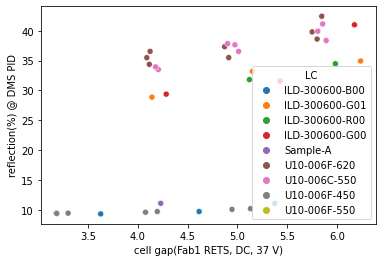

In [24]:
sns.scatterplot(data=df, x='cell gap(Fab1 RETS, DC, 37 V)', y='反射率(DMS_PID)', hue='LC')
plt.ylabel("reflection(%) @ DMS PID")
plt.savefig('reflec_pid.png')
plt.show()

In [29]:
df["LC"].unique()

array(['ILD-300600-B00', 'ILD-300600-G01', 'ILD-300600-R00',
       'ILD-300600-G00', 'Sample-A', 'U10-006F-620', 'U10-006C-550',
       'U10-006F-450', 'U10-006F-550', nan], dtype=object)

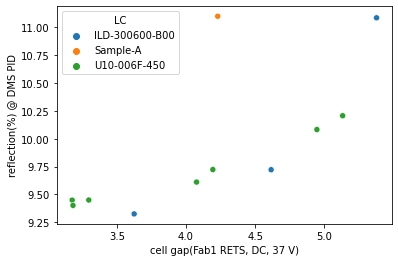

In [31]:
tmp_df = df[(df["LC"] == 'ILD-300600-B00') | (df["LC"] == 'Sample-A') | (df["LC"] == 'U10-006F-450')]
sns.scatterplot(data=tmp_df, x='cell gap(Fab1 RETS, DC, 37 V)', y='反射率(DMS_PID)', hue='LC')
plt.ylabel("reflection(%) @ DMS PID")
plt.savefig('reflec_pid_blue.png')
plt.show()

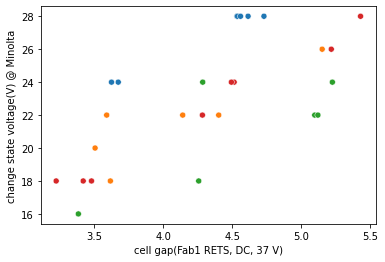

In [27]:
sns.scatterplot(data=df, x='cell gap(Fab1 RETS, DC, 37 V)', y='轉態電壓(V_Dark)(Minolta)', hue='LC')
plt.ylabel("change state voltage(V) @ Minolta")
plt.legend().remove()
plt.savefig('v_dark_mino.png')
plt.show()

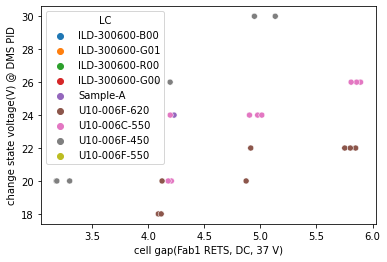

In [26]:
sns.scatterplot(data=df, x='cell gap(Fab1 RETS, DC, 37 V)', y='轉態電壓(V_Dark)(DMS_PID)', hue='LC')
plt.ylabel("change state voltage(V) @ DMS PID")
plt.savefig("v_dark_pid.png")
plt.show()

In [18]:
df.columns

Index(['LC', 'R/L', 'suplier', 'type', 'spacer', 'ID',
       'compress-params(weight, kgw)', 'compress-params(time, min)',
       'cell gap(TOC AXO Step, DC, 34 V)', 'pre-tilt(TOC AXO Step, DC, 34 V)',
       'cell gap(TOC AXO Step, AC, 34 V)', 'pre-tilt(TOC AXO Step, AC, 34 V)',
       'cell gap(Fab1 RETS, DC, 34 V)', 'cell gap(Fab1 RETS, DC, 37 V)',
       'cell gap(Fab1 RETS, AC, 50 V)', 'cell gap(T1 RETS, DC, 34 V)',
       'cell gap(T1 RETS, DC, 37 V)', 'cell gap(T1 RETS, AC, 50 V)',
       'cell gap(T2 AXO, DC, 35 V)', 'cell gap(T3 RETS, DC, 34 V)',
       'cell gap(T3 RETS, DC, 37 V)', 'cell gap(T3 RETS, AC, 50 V)',
       'fab_rets_37v_to_toc_axo_34v', 'OPT measure', 'Stat', 'Location',
       'Next', '反射率(Minolta)', '中心波長(Minolta)', '轉態電壓(V_Dark)(Minolta)',
       '驅動方式(tReset, tIinterval, tVx @Hz)(Minolta)', '反射率(DMS_PID)',
       '中心波長(DMS_PID)', '轉態電壓(V_Dark)(DMS_PID)',
       '驅動方式(tReset, tIinterval, tVx @Hz)(DMS_PID)'],
      dtype='object')

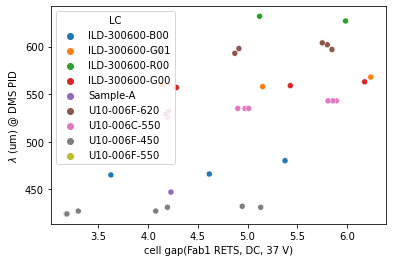

In [32]:
sns.scatterplot(data=df, x='cell gap(Fab1 RETS, DC, 37 V)', y='中心波長(DMS_PID)', hue='LC')
plt.ylabel("$\lambda$ (um) @ DMS PID")
plt.savefig('central_peak_wavelength.png')
plt.show()

In [44]:
df.groupby(by="LC", as_index=False)[["LC", '中心波長(DMS_PID)']].mean().sort_values(by='中心波長(DMS_PID)')

,LC,中心波長(DMS_PID)
6,U10-006F-450,428.000000
4,Sample-A,447.000000
0,ILD-300600-B00,470.333333
5,U10-006C-550,535.666667
1,ILD-300600-G00,559.666667
2,ILD-300600-G01,562.000000
8,U10-006F-620,597.875000
3,ILD-300600-R00,629.500000
7,U10-006F-550,NaN


In [25]:
# define color by its average wavelength
red = {
    'U10-006F-620': "#ffc500",
    'ILD-300600-R00': "#ff4f00"
}

# green color isn't that great, shift it by -50 nm
green = {
    'ILD-300600-G01': "#0fff00",
    'ILD-300600-G00': "#00ff00",
    'U10-006C-550': "#00ffd5"
}
blue = {
    'ILD-300600-B00': "#00a9ff",
    'U10-006F-450': "#7600ed", # shift to 415 for distinguish
    'Sample-A': "#0035ff"
}

colors = {
    "red": red, 
    "green": green, 
    "blue": blue
}

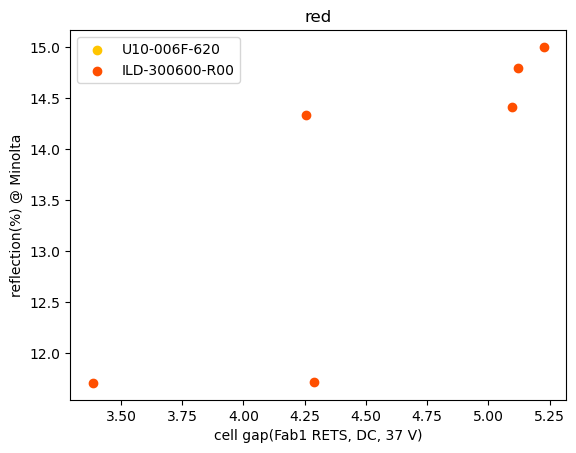

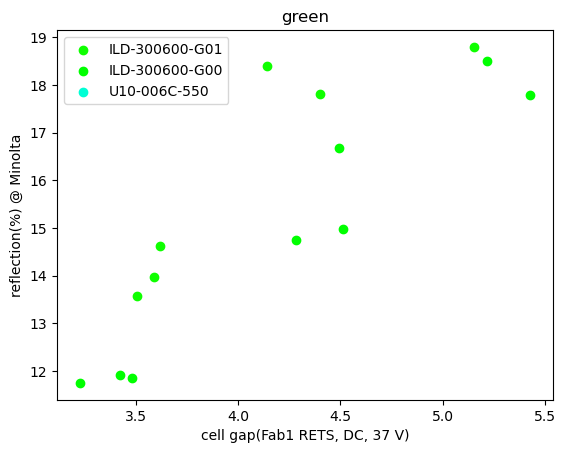

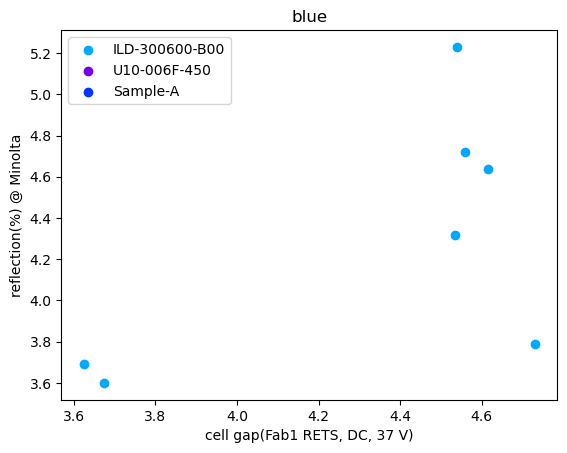

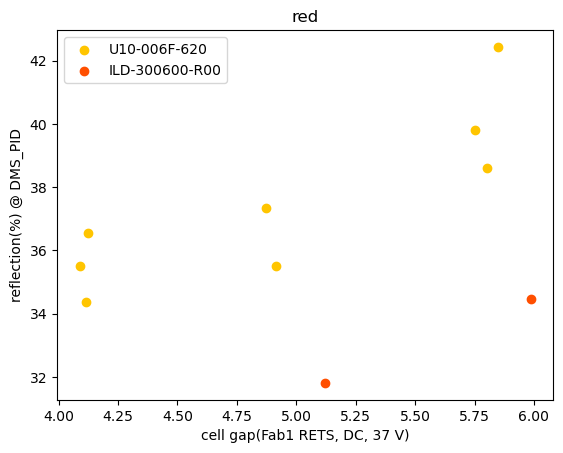

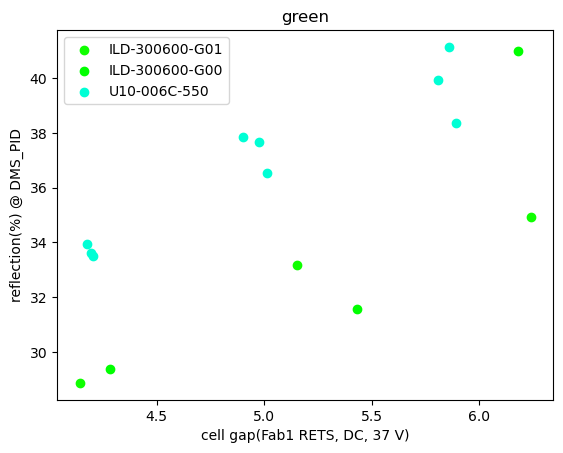

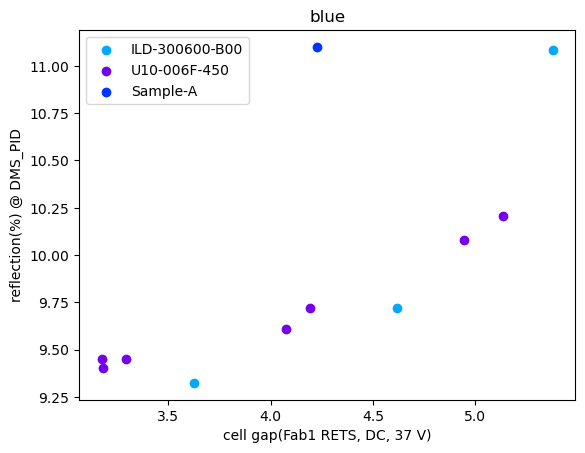

In [27]:
for mech in ["Minolta", "DMS_PID"]:
    for color, LCs in colors.items():
        for LC in LCs:
            tmp_df = df[df["LC"] == LC]
            plt.scatter(tmp_df["cell gap(Fab1 RETS, DC, 37 V)"], tmp_df[f"反射率({mech})"], label=LC, c=LCs[LC])
        plt.xlabel('cell gap(Fab1 RETS, DC, 37 V)')
        plt.ylabel(f'reflection(%) @ {mech}')
        plt.title(color)
        plt.legend()
        plt.savefig(f"reflec_{mech}_{color}")
        plt.show()


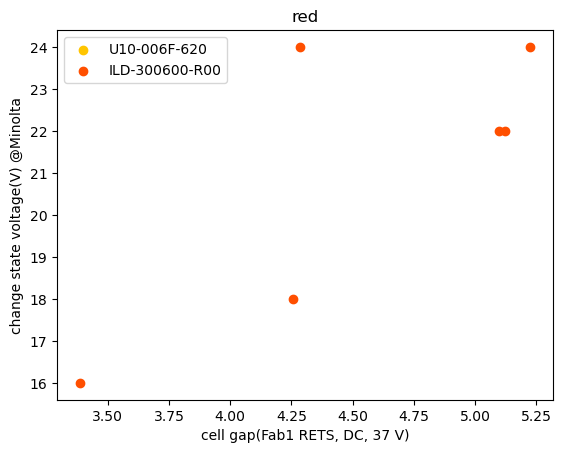

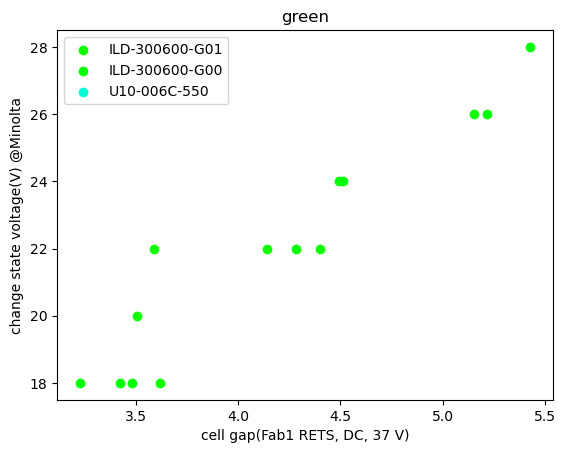

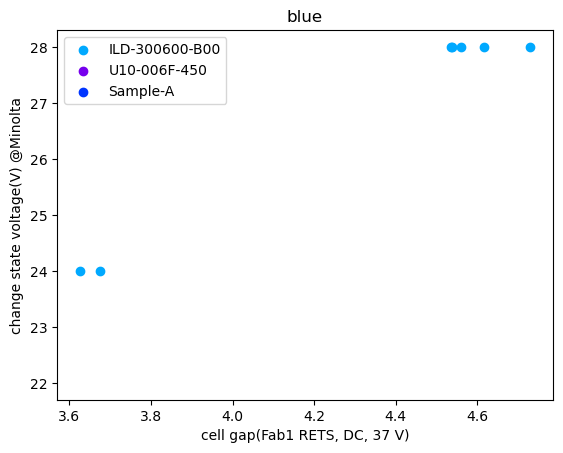

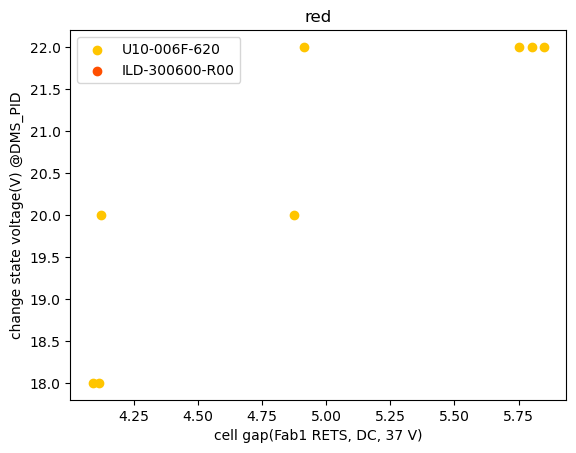

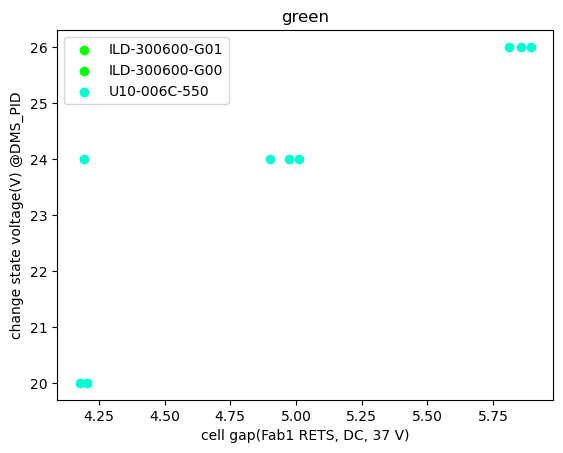

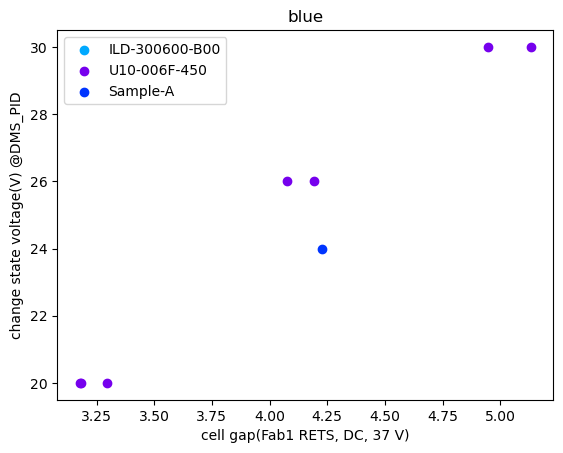

In [29]:
for mech in ["Minolta", "DMS_PID"]:
    for color, LCs in colors.items():
        for LC in LCs:
            tmp_df = df[df["LC"] == LC]
            plt.scatter(tmp_df["cell gap(Fab1 RETS, DC, 37 V)"], tmp_df[f"轉態電壓(V_Dark)({mech})"], label=LC, c=LCs[LC])
        plt.xlabel('cell gap(Fab1 RETS, DC, 37 V)')
        plt.ylabel(f'change state voltage(V) @{mech}')
        plt.title(color)
        plt.legend()
        plt.savefig(f"v_dark_{mech}_{color}")
        plt.show()

No handles with labels found to put in legend.


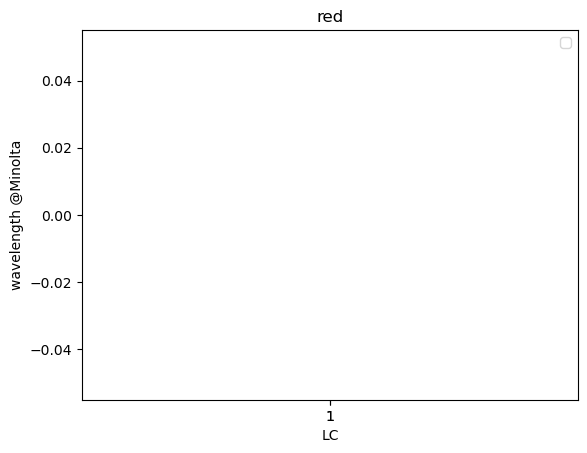

No handles with labels found to put in legend.


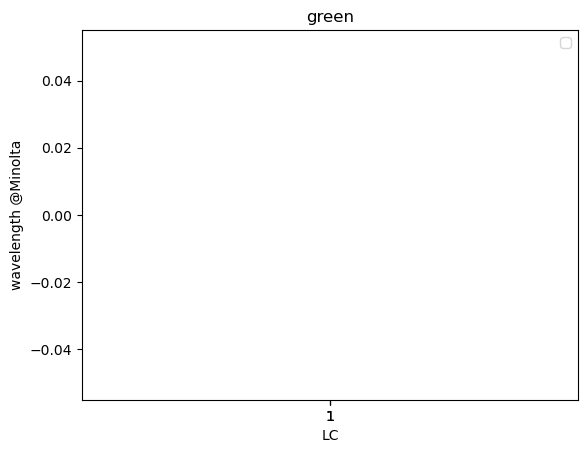

No handles with labels found to put in legend.


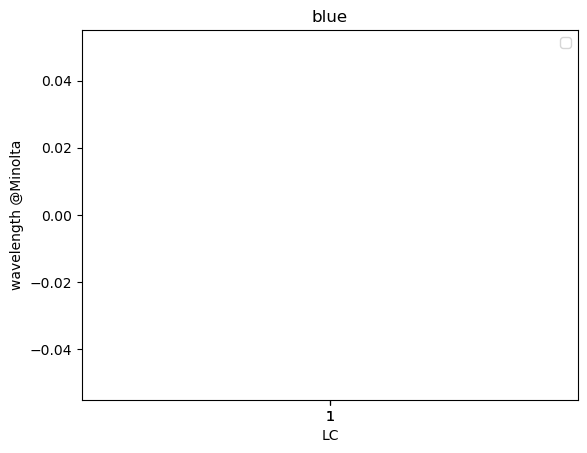

No handles with labels found to put in legend.


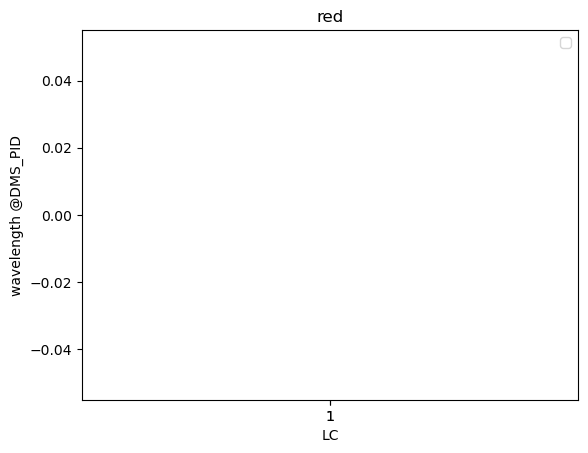

No handles with labels found to put in legend.


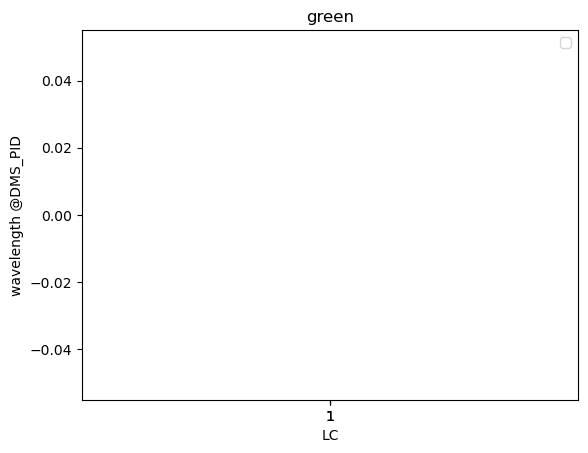

No handles with labels found to put in legend.


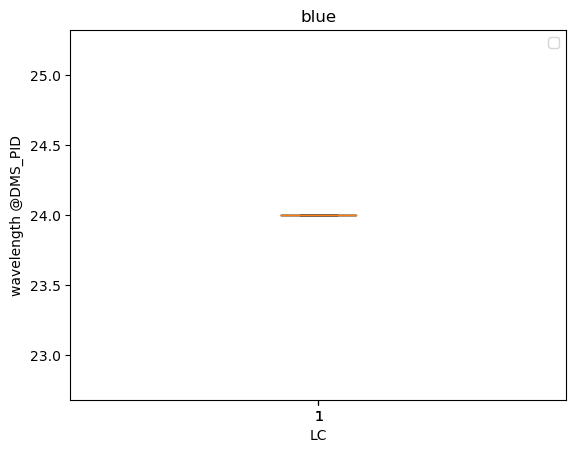

In [37]:
for mech in ["Minolta", "DMS_PID"]:
    for color, LCs in colors.items():
        for LC in LCs:
            tmp_df = df[df["LC"] == LC]
            plt.boxplot(tmp_df[f"轉態電壓(V_Dark)({mech})"])
        plt.xlabel('LC')
        plt.ylabel(f'wavelength @{mech}')
        plt.title(color)
        plt.legend()
#         plt.savefig(f"v_dark_{mech}_{color}")
        plt.show()